In [35]:
import tensorflow as tf
import pandas as pd
from utils import preprocess_dataframe  # Import the updated function
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Import data

In [36]:
# Load dataset
data = pd.read_csv('data/loan_data.csv')
# Let's check the kind of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

# Preprocessing

In [37]:
# Split the data into training and validation sets
train_data, validation_data = train_test_split(data, test_size=0.2, random_state=42)

# Check the sizes of the splits
print(f"Training data size: {len(train_data)}")
print(f"Validation data size: {len(validation_data)}")


Training data size: 36000
Validation data size: 9000


In [38]:
#Split features and labels
train_features= train_data.iloc[:, :-1]  # All columns except the last
train_labels= train_data.iloc[:, -1]     # Only the last column
validation_features= validation_data.iloc[:, :-1]  # All columns except the last
validation_labels= validation_data.iloc[:, -1]     # Only the last column

In [39]:
# Preprocess the data (returns a cleaned DataFrame)
preprocessed_train_features = preprocess_dataframe(train_features)
preprocessed_validation_features = preprocess_dataframe(validation_features)
# Let's check the kind of data
preprocessed_train_features.info()


<class 'pandas.core.frame.DataFrame'>
Index: 36000 entries, 25180 to 15795
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      36000 non-null  float64
 1   person_income                   36000 non-null  float64
 2   person_emp_exp                  36000 non-null  float64
 3   loan_amnt                       36000 non-null  float64
 4   loan_int_rate                   36000 non-null  float64
 5   loan_percent_income             36000 non-null  float64
 6   cb_person_cred_hist_length      36000 non-null  float64
 7   credit_score                    36000 non-null  float64
 8   previous_loan_defaults_on_file  36000 non-null  float64
 9   person_gender_female            36000 non-null  float64
 10  person_gender_male              36000 non-null  float64
 11  person_education_Associate      36000 non-null  float64
 12  person_education_Bachelor       3

In [40]:
# Let's have a look at the first few rows of the preprocessed data
print(preprocessed_train_features.head())

       person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
25180    0.112903       0.012410           0.088   0.420290       0.501372   
12555    0.040323       0.009030           0.024   0.333333       0.441701   
29153    0.169355       0.043738           0.144   0.681159       0.339506   
23838    0.056452       0.011989           0.032   0.263768       0.803841   
35686    0.056452       0.010688           0.056   0.190116       0.517833   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
25180             0.238095                    0.250000      0.523913   
12555             0.253968                    0.071429      0.584783   
29153             0.111111                    0.321429      0.636957   
23838             0.158730                    0.178571      0.545652   
35686             0.126984                    0.035714      0.686957   

       previous_loan_defaults_on_file  person_gender_female  ...  \
25180                         

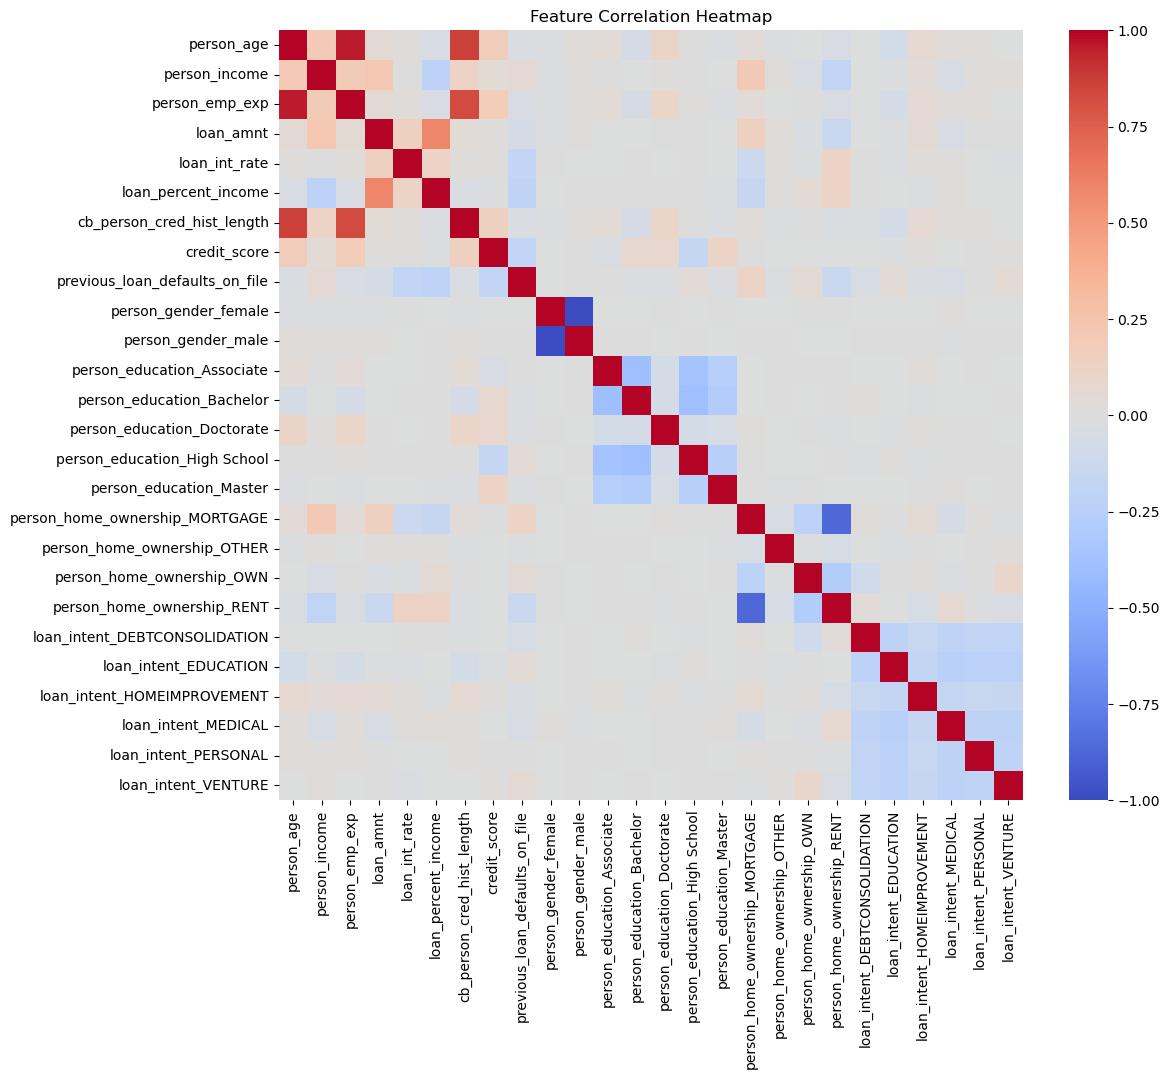

In [41]:
# Check correlation between features

# Compute the correlation matrix
correlation_matrix = preprocessed_train_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# We can clearly see that features are in general not correlated, but there are some diagonal blocks
# that are obviously correlated because of the one-hot encoding. It should nit be a problem.

# Classification models

In [42]:
# First try LOGISTIC REGRESSION

# Initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logistic_model.fit(preprocessed_train_features, train_labels)

# Predictions
train_predictions = logistic_model.predict(preprocessed_train_features)
validation_predictions = logistic_model.predict(preprocessed_validation_features)

# Calculate and print the accuracy
accuracy_training = accuracy_score(train_labels, train_predictions)
print(f"Accuracy on training data: {accuracy_training:.2f}")
accuracy_validation = accuracy_score(validation_labels, validation_predictions)
print(f"Accuracy on validation data: {accuracy_validation:.2f}")

Accuracy on training data: 0.90
Accuracy on validation data: 0.89


In [43]:
# More compplete report of the results

from sklearn.metrics import classification_report, confusion_matrix

# Generate the classification report
print("Classification Report (Training Data):")
print(classification_report(train_labels, train_predictions))

print("\nClassification Report (Validation Data):")
print(classification_report(validation_labels, validation_predictions))

# Generate the confusion matrix
print("\nConfusion Matrix (Training Data):")
print(confusion_matrix(train_labels, train_predictions))

print("\nConfusion Matrix (Validation Data):")
print(confusion_matrix(validation_labels, validation_predictions))

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     28010
           1       0.78      0.75      0.76      7990

    accuracy                           0.90     36000
   macro avg       0.85      0.84      0.85     36000
weighted avg       0.90      0.90      0.90     36000


Classification Report (Validation Data):
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      6990
           1       0.82      0.66      0.73      2010

    accuracy                           0.89      9000
   macro avg       0.86      0.81      0.83      9000
weighted avg       0.89      0.89      0.89      9000


Confusion Matrix (Training Data):
[[26301  1709]
 [ 2016  5974]]

Confusion Matrix (Validation Data):
[[6691  299]
 [ 681 1329]]


In [44]:
#Define a set of classifiers, we test them and choose the best one
# Import the necessary classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


ClassificationModels = {
    'Logisitic Regression' : LogisticRegression() ,
    'Random Forest' : RandomForestClassifier() , 
    'Descion Tree': DecisionTreeClassifier() , 
    'SVC' : SVC() , 
    'XGBoost' : XGBClassifier()
}

In [45]:
# Train the models. In the loop we ready the dictonary, name are the keys (strings) and model are the values (the classifiers)
for name, model in ClassificationModels.items():
    model.fit(preprocessed_train_features, train_labels)
    print(f"{name} model has been trained successfully!")

Logisitic Regression model has been trained successfully!
Random Forest model has been trained successfully!
Descion Tree model has been trained successfully!
SVC model has been trained successfully!
XGBoost model has been trained successfully!


In [46]:
#we can now test the models on the validation set and calculate the accuracy and f1-score
from sklearn.metrics import f1_score


list_classifiers=[]
accuracy_train_list=[]
accuracy_validation_list=[]
f1score_train_list=[]  #This will be the f1-score of class 1, which is the difficult thing to detect as 1 is undersampled!
f1score_validation_list=[]

for name, model in ClassificationModels.items():
    # Append name of the classifier to the list
    list_classifiers.append(name)
    print(f" {name} scores:")
    
    # Make predictions on the train and validation set
    predictions_train = model.predict(preprocessed_train_features)
    predictions_validation = model.predict(preprocessed_validation_features)
    
    # Append accuracy to the list
    accuracy_train = accuracy_score(train_labels, predictions_train)
    accuracy_train_list.append(accuracy_train)
    
    accuracy_validation = accuracy_score(validation_labels, predictions_validation)
    accuracy_validation_list.append(accuracy_validation)
    
    # Append f1-score to the list   
    f1score_train = f1_score(train_labels, predictions_train)
    f1score_train_list.append(f1score_train)
    
    f1score_validation = f1_score(validation_labels, predictions_validation)
    f1score_validation_list.append(f1score_validation)
    
    # Print detailed scores
    print("Training Data:")
    print( classification_report(train_labels, predictions_train))
    print("Validation Data:")
    print( classification_report(validation_labels, predictions_validation))

 Logisitic Regression scores:
Training Data:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     28010
           1       0.78      0.75      0.76      7990

    accuracy                           0.90     36000
   macro avg       0.85      0.84      0.85     36000
weighted avg       0.90      0.90      0.90     36000

Validation Data:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      6990
           1       0.82      0.66      0.73      2010

    accuracy                           0.89      9000
   macro avg       0.86      0.81      0.83      9000
weighted avg       0.89      0.89      0.89      9000

 Random Forest scores:
Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28010
           1       1.00      1.00      1.00      7990

    accuracy                           1.00     36000
   macro avg       1.00     

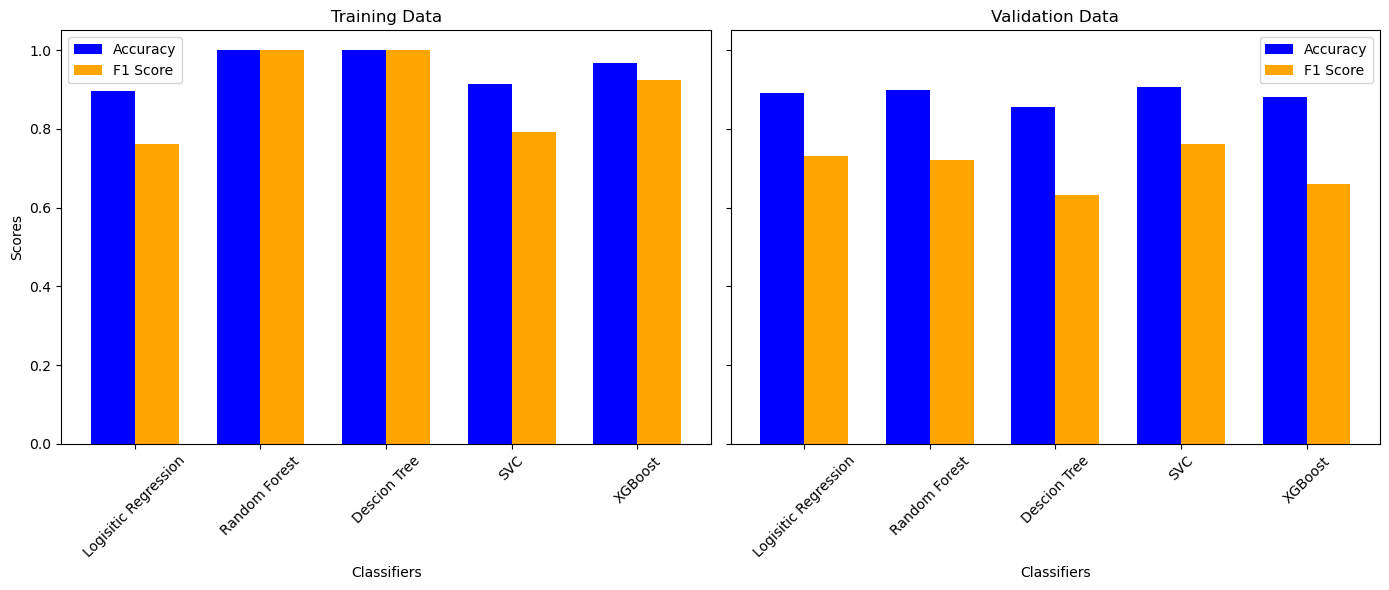

In [47]:
import numpy as np

# Define the width of each bar
bar_width = 0.35

# Define the positions of the bars
x = np.arange(len(list_classifiers))

# Plot histograms for accuracy and F1 score vs classifiers
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Training data
axes[0].bar(x - bar_width / 2, accuracy_train_list, bar_width, label='Accuracy', color='blue')
axes[0].bar(x + bar_width / 2, f1score_train_list, bar_width, label='F1 Score', color='orange')
axes[0].set_title('Training Data')
axes[0].set_xlabel('Classifiers')
axes[0].set_ylabel('Scores')
axes[0].set_xticks(x)
axes[0].set_xticklabels(list_classifiers, rotation=45)
axes[0].legend()

# Validation data
axes[1].bar(x - bar_width / 2, accuracy_validation_list, bar_width, label='Accuracy', color='blue')
axes[1].bar(x + bar_width / 2, f1score_validation_list, bar_width, label='F1 Score', color='orange')
axes[1].set_title('Validation Data')
axes[1].set_xlabel('Classifiers')
axes[1].set_xticks(x)
axes[1].set_xticklabels(list_classifiers, rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()

In [48]:
print(f1score_validation_list)

[0.7306212204507971, 0.7201228878648234, 0.632473788608671, 0.7623542476401999, 0.6605562579013906]


Conclusions:
It seems that SVC is best classifier. The accuracy on validation data is 0.92. However, it is important to detect well the 1s, to this extent the f1 (harmonic mean of recall and precision) score is more useful. We get f1: 0.76. Also the logistic regression scores well (0.73)

# Dimensional reduction

In [49]:
# Calculate the correlation between each feature and the label
correlations_with_label = preprocessed_train_features.corrwith(train_labels)

# Sort the correlations in descending order
sorted_correlations = abs(correlations_with_label).sort_values(ascending=False)

# Display the sorted correlations
print(sorted_correlations)

previous_loan_defaults_on_file    0.541653
loan_percent_income               0.390145
loan_int_rate                     0.332102
person_home_ownership_RENT        0.256848
person_home_ownership_MORTGAGE    0.214616
person_income                     0.130160
loan_amnt                         0.111054
person_home_ownership_OWN         0.093908
loan_intent_VENTURE               0.087492
loan_intent_DEBTCONSOLIDATION     0.082408
loan_intent_MEDICAL               0.066327
loan_intent_EDUCATION             0.062780
loan_intent_HOMEIMPROVEMENT       0.034261
loan_intent_PERSONAL              0.022076
person_age                        0.020595
person_emp_exp                    0.018637
cb_person_cred_hist_length        0.013612
person_home_ownership_OTHER       0.011523
credit_score                      0.006488
person_education_Master           0.005140
person_education_High School      0.004360
person_gender_female              0.003799
person_gender_male                0.003799
person_educ

In [50]:
# Filter the keys with correlations greater than 0.1
selected_keys = correlations_with_label[correlations_with_label.abs() > 0.1].index

# Create a reduced DataFrame with the selected keys
reduced_train_features = preprocessed_train_features[selected_keys]
reduced_validation_features = preprocessed_validation_features[selected_keys]

# Display the reduced DataFrame
print(reduced_train_features.head())

       person_income  loan_amnt  loan_int_rate  loan_percent_income  \
25180       0.012410   0.420290       0.501372             0.238095   
12555       0.009030   0.333333       0.441701             0.253968   
29153       0.043738   0.681159       0.339506             0.111111   
23838       0.011989   0.263768       0.803841             0.158730   
35686       0.010688   0.190116       0.517833             0.126984   

       previous_loan_defaults_on_file  person_home_ownership_MORTGAGE  \
25180                             0.0                             1.0   
12555                             1.0                             0.0   
29153                             1.0                             1.0   
23838                             0.0                             0.0   
35686                             1.0                             0.0   

       person_home_ownership_RENT  
25180                         0.0  
12555                         1.0  
29153                     

In [51]:
# 1 LOGISTIC REGRESSION on reduced features

# Initialize the logistic regression model
logistic_model_reduced = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logistic_model_reduced.fit(reduced_train_features, train_labels)

# Predictions
train_predictions_reduced = logistic_model_reduced.predict(reduced_train_features)
validation_predictions_reduced = logistic_model_reduced.predict(reduced_validation_features)

# Calculate and print the accuracy
accuracy_training = accuracy_score(train_labels, train_predictions_reduced)
print(f"Accuracy on training data: {accuracy_training:.2f}")
f1score_training = f1_score(train_labels, train_predictions_reduced)
print(f"F1 Score on training data: {f1score_training:.2f}")

accuracy_validation = accuracy_score(validation_labels, validation_predictions_reduced)
print(f"Accuracy on validation data: {accuracy_validation:.2f}")
f1score_validation = f1_score(validation_labels, validation_predictions_reduced)
print(f"F1 Score on validation data: {f1score_validation:.2f}")

Accuracy on training data: 0.89
F1 Score on training data: 0.75
Accuracy on validation data: 0.88
F1 Score on validation data: 0.73


From this quick and rudimental dimensional reduction we learn that actually most of the information is in few feature, the ones mostly correlated with the labels. (It could be used more systematically using standard PCA)

POSSIBLE IMPROVEMENTS: some data cleaning could improve the results, for example there are a couple of ages that looks too high and are possoble typos. It's a very straightforward fix.